<a href="https://colab.research.google.com/github/cassales/Hackathon2024Bootcamp/blob/master/Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this following block, we will load the following libraries and functions that we will be using
- pandas :- A library focused on data processing and manipulation
- seaborn :- A powerful visualization library with user friendly features
- matplotlib :- A native plotting library seaborn is built upon
- train_test_split :- a function used to split the dataset randomly, which would be useful to evaluate the performance of the machine learning algorithm
- StandardScaler :- a function used to normalize (scale the values in the features) so that the features are relatively in the same scale
- GridSearchCV :- a helper function to systematically evaluate the performance of a machine learning algorithm over a provided list of parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In the next block, we will download the data files from my homepage in the Waikato University web server

In [ ]:
!wget https://raw.githubusercontent.com/nlim-uow/my_notes/main/housing_train.csv
!wget https://raw.githubusercontent.com/nlim-uow/my_notes/main/housing_test.csv


--2023-11-03 01:28:03--  https://cms.waikato.ac.nz/~nlim/data/housing_train.csv
Resolving cms.waikato.ac.nz (cms.waikato.ac.nz)... 130.217.226.35
Connecting to cms.waikato.ac.nz (cms.waikato.ac.nz)|130.217.226.35|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cms.waikato.ac.nz/~nlim/data/housing_train.csv [following]
--2023-11-03 01:28:04--  https://www.cms.waikato.ac.nz/~nlim/data/housing_train.csv
Resolving www.cms.waikato.ac.nz (www.cms.waikato.ac.nz)... 130.217.226.35
Connecting to www.cms.waikato.ac.nz (www.cms.waikato.ac.nz)|130.217.226.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16017 (16K) [text/csv]
Saving to: ‘housing_train.csv.1’

housing_train.csv.1 100%[===================>]  15.64K  98.6KB/s    in 0.2s    

2023-11-03 01:28:05 (98.6 KB/s) - ‘housing_train.csv.1’ saved [16017/16017]

--2023-11-03 01:28:05--  https://cms.waikato.ac.nz/~nlim/data/housing_test.csv
Resolving cms.waikato.ac

and load the csv file using Pandas as a dataframe



In [ ]:
df_train=pd.read_csv('housing_train.csv')
df_test=pd.read_csv('housing_test.csv')


again, a good practice is to look at the summary and the first few entries of the dataframe. This dataset is "clean" and do not require additional preprocessing. For examples of data that require cleaning and how we process them, please look at the companion notebook in module 2

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     331 non-null    float64
 1   X2 house age                            331 non-null    float64
 2   X3 distance to the nearest MRT station  331 non-null    float64
 3   X4 number of convenience stores         331 non-null    int64  
 4   X5 latitude                             331 non-null    float64
 5   X6 longitude                            331 non-null    float64
 6   Y house price of unit area              331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.2 KB


In [ ]:
df_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.750,13.5,4197.3490,0,24.93885,121.50383,18.6
1,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
2,2013.083,14.0,438.8513,1,24.97493,121.52730,42.6
3,2013.333,1.7,329.9747,5,24.98254,121.54395,50.4
4,2012.667,37.1,918.6357,1,24.97198,121.55063,31.9


In the next blocks, we will visualize the data. It is usually a good practice to do some quick visualization, to glean insights on which machine learning algorithm may be more performant

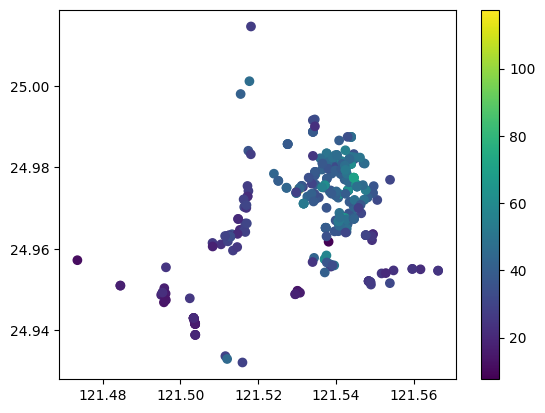

In [ ]:
plt.scatter(df_train['X6 longitude'],df_train['X5 latitude'],c=df_train['Y house price of unit area'])
plt.colorbar()
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_mapbox(df_train, lat='X5 latitude',lon='X6 longitude',color='Y house price of unit area', mapbox_style='open-street-map',zoom=11,height=640,width=800)
fig.show()

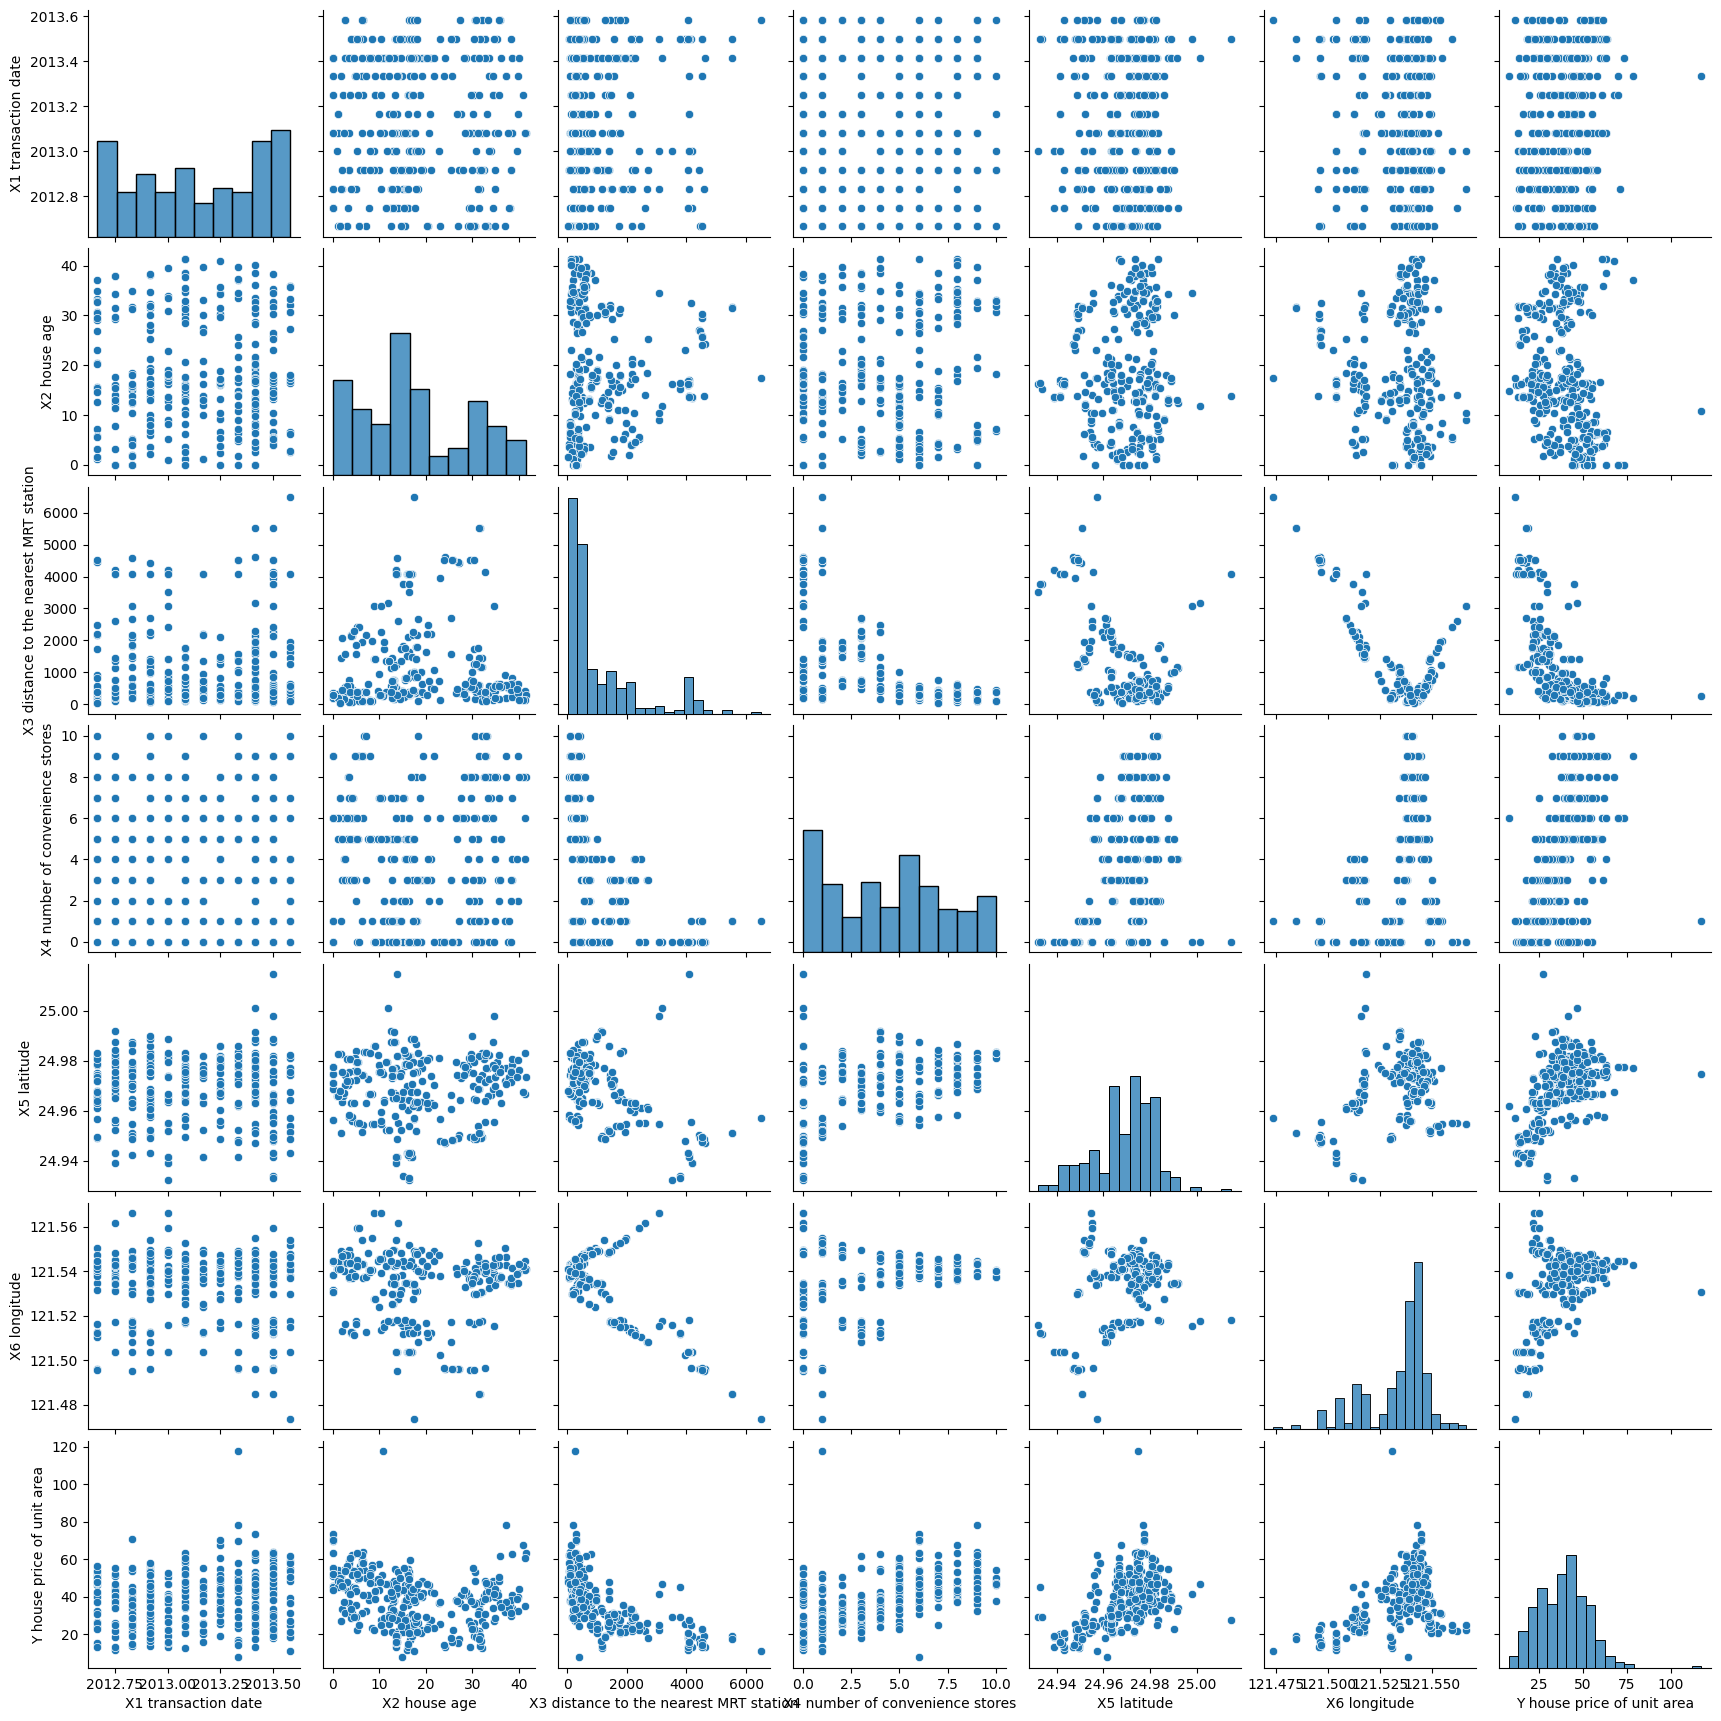

In [ ]:
sns.pairplot(df_train)
plt.show()

---

We now split the data, it is customary to preprend the predictor features with "X", and the target predicted values with y



In [ ]:
X_train=df_train.drop(columns=['Y house price of unit area'])
X_test=df_test.drop(columns=['Y house price of unit area'])
y_train=df_train['Y house price of unit area']
y_test=df_test['Y house price of unit area']

In the next block, we imported some of the machine learning algorithms, here are some algorithms we will look at
- Linear models (Linear Regression, SGDRegressor (including Lasso, Ridge, ElasticNet regressor)
- Decision trees based method (Single decision tree, ensemble of decision trees (Random Forest, Gradient Boosted Trees))
- Distance based methods (kNeighbourRegressor)
- Kernel (Non-linear) models (Support Vector Regression)


In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


Linear Regression (also known in Statistics as Ordinary Least Squared (OLS) Regression) is a simple statistical method to fit a linear equation through the data that minimizes the error between the target value and the predicted value

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

One helpful way to evaluate the performance of a regression, is to look at the predicted versus target value plot and also report the correlation of the predicted value and the target value.

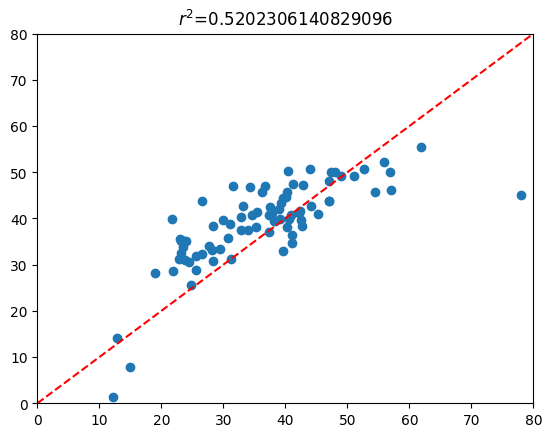

In [ ]:
y_pred=reg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test,y_test)}')
plt.show()

One useful thing we can glean from the fitted model is the linear equation calculated by the algorithm, we can do that through some of the properties present in the model.

In [ ]:
print('Coefficients')
print(reg.coef_)

print('Intercept')
print(reg.intercept_)


Coefficients
[ 6.38081588e+00 -2.89189999e-01 -4.73198617e-03  1.05219139e+00
  2.33296855e+02 -3.51368846e+01]
Intercept
-14355.912000496483


In [ ]:
test_list=[f'{reg.coef_[i]} * {X_train.columns[i]}' for i in range(6)]
print(f'Y = {reg.intercept_} + {" + ".join(test_list)}')

Y = -14355.912000496483 + 6.380815878429863 * X1 transaction date + -0.28918999938074236 * X2 house age + -0.0047319861670611085 * X3 distance to the nearest MRT station + 1.0521913869012154 * X4 number of convenience stores + 233.29685452365086 * X5 latitude + -35.136884577193534 * X6 longitude


Sometimes, OLS is not possible, it can happen due to one or more of the following
- there are more features than observations
- There are far too many observations to for the matrix used to calculate OLS to fit in memory
- Solving the OLS has convergence issues
- The OLS model is overfitted and we would like to apply some regularization,

In which case we can use SGDRegressor. Please refer to the slides if you would like details on what exactly is happening

In [ ]:
reg_sgd=SGDRegressor()

We can use the GridSearch function, to programmatically run SGDRegressor over a set of parameter settings, and get sklearn to report performance of the settings

In [ ]:
param_dict={
    'alpha':[0.3,0.1,0.03],
    'l1_ratio':[0,0.5,1]
}

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
gridsearch=GridSearchCV(reg_sgd,param_dict)
gridsearch.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.3, 0.1, 0.03], 'l1_ratio': [0, 0.5, 1]})

In [ ]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001677,0.000428,0.000556,0.000061,0.3,0,"{'alpha': 0.3, 'l1_ratio': 0}",0.579934,0.673997,0.660509,0.425888,0.401367,0.548339,0.114861,8
1,0.001861,0.000468,0.000653,0.000168,0.3,0.5,"{'alpha': 0.3, 'l1_ratio': 0.5}",0.581558,0.673690,0.658240,0.426067,0.402020,0.548315,0.114241,9
2,0.001361,0.000133,0.000487,0.000028,0.3,1,"{'alpha': 0.3, 'l1_ratio': 1}",0.581625,0.672739,0.659590,0.429721,0.399385,0.548612,0.114208,7
3,0.001571,0.000101,0.000537,0.000116,0.1,0,"{'alpha': 0.1, 'l1_ratio': 0}",0.593143,0.679942,0.675614,0.402306,0.415133,0.553227,0.122046,1
4,0.001496,0.000213,0.000473,0.000007,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.589335,0.679746,0.674708,0.401088,0.412575,0.551491,0.122460,3
5,0.002325,0.000336,0.000758,0.000037,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",0.592138,0.679773,0.675220,0.398156,0.414671,0.551992,0.123002,2
6,0.002916,0.000339,0.000774,0.000028,0.03,0,"{'alpha': 0.03, 'l1_ratio': 0}",0.589383,0.678907,0.682972,0.382723,0.421004,0.550998,0.126859,4
7,0.002564,0.000347,0.000792,0.000054,0.03,0.5,"{'alpha': 0.03, 'l1_ratio': 0.5}",0.589260,0.679045,0.681089,0.381795,0.419521,0.550142,0.127040,5
8,0.002768,0.000251,0.000724,0.000081,0.03,1,"{'alpha': 0.03, 'l1_ratio': 1}",0.589800,0.679608,0.682808,0.376443,0.421526,0.550037,0.128568,6


Now that we found that the regression performs best with alpha=0.1 and l1_ratio=1, we use this setting to fit our SGDRegressor, and evaluate the regression

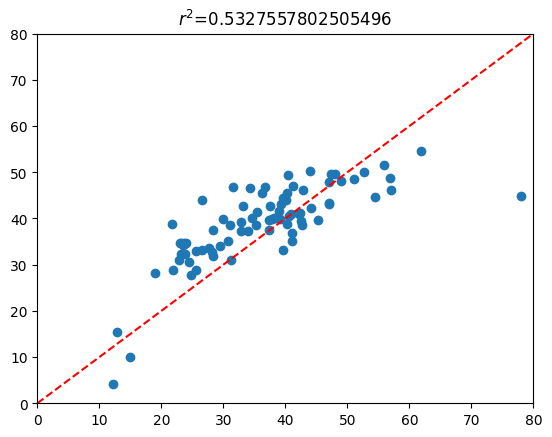

In [ ]:
reg_sgd=SGDRegressor(alpha=0.1,l1_ratio=1)
reg_sgd.fit(X_train_scaled,y_train)
y_pred=reg_sgd.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg_sgd.score(X_test_scaled,y_test)}')
plt.show()

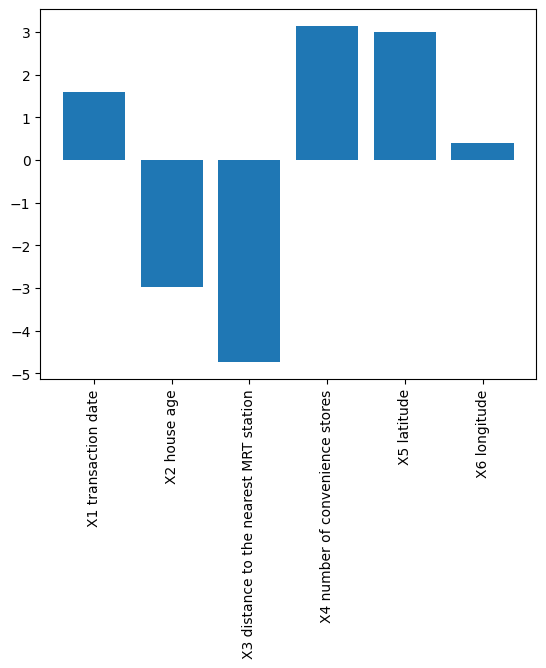

In [ ]:
plt.bar(x=X_train.columns,height=reg_sgd.coef_)
plt.xticks(rotation=90)
plt.show()

The next family of regressors are decision tree based regression, you may notice by now, that way the "learners" are fitted and called in sklearn is very consistant, and we can reuse large blocks of our code

In [ ]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

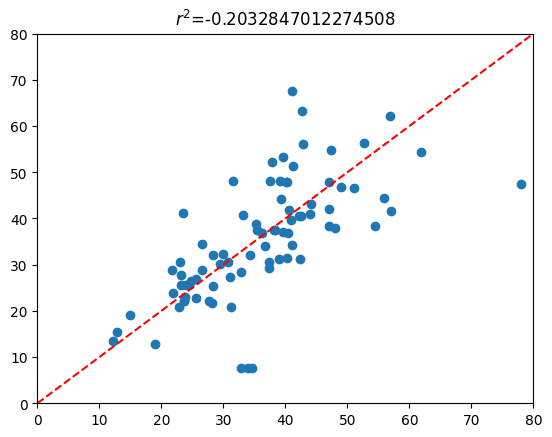

In [ ]:
y_pred=reg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test,y_test)}')
plt.show()

One part that is unique to the different family of machine learning algorithms is how we can intepret the model. The following block plots the decision tree, and shows the feature importance (this is equivalent to how often each feature appears in the tree)

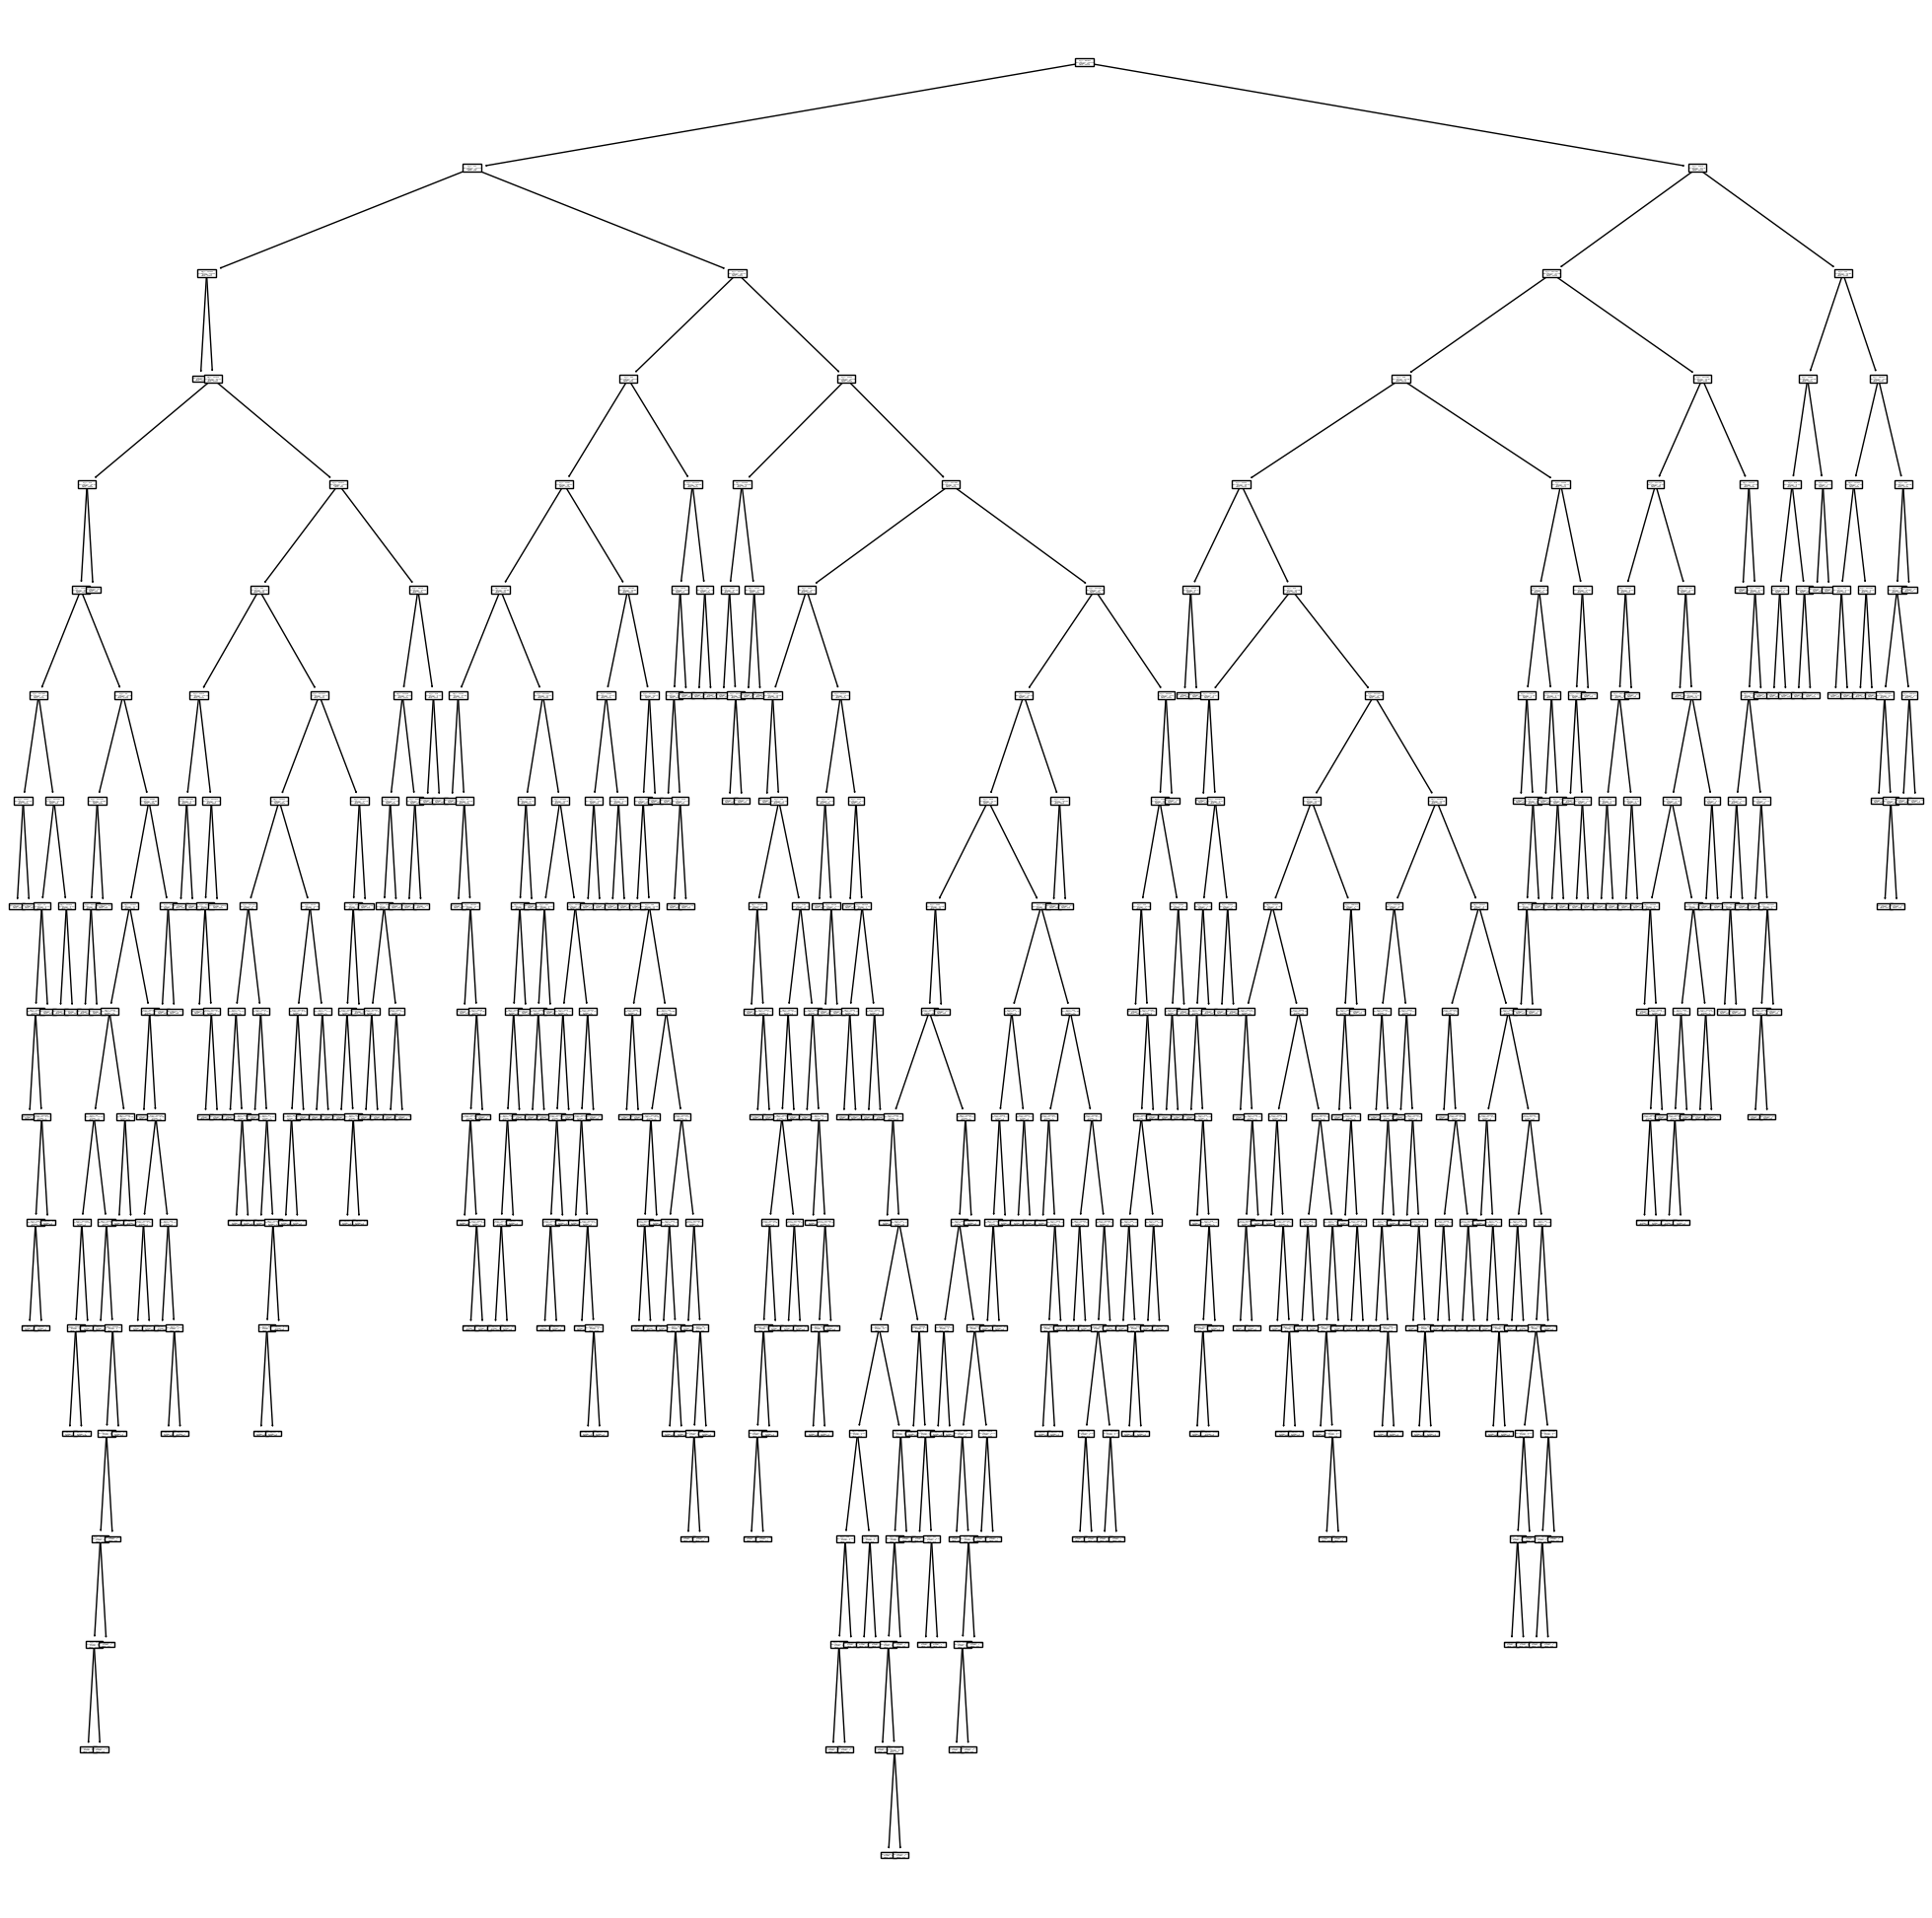

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(25,25))
_ = plot_tree(reg)

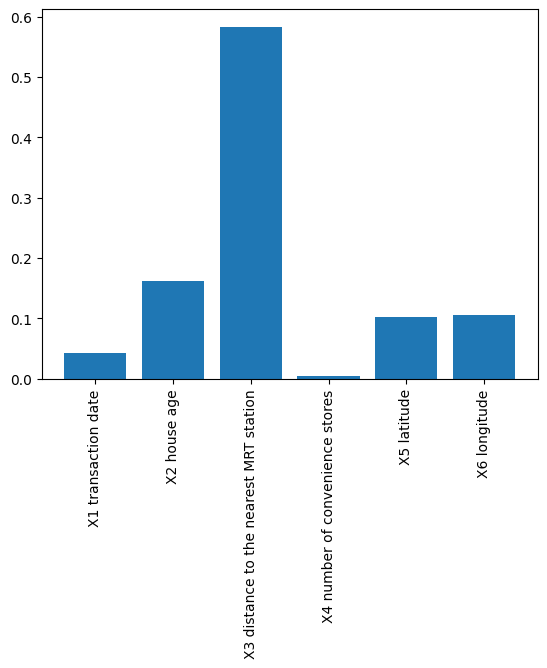

In [ ]:
plt.bar(x=X_train.columns,height=reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

This following block is for Random Forest Regressors, while it is not possible to plot the individual trees, it is however possible to plot the feature importance  

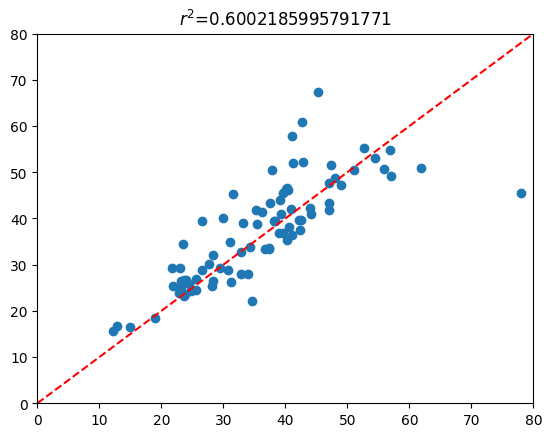

In [ ]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test,y_test)}')
plt.show()

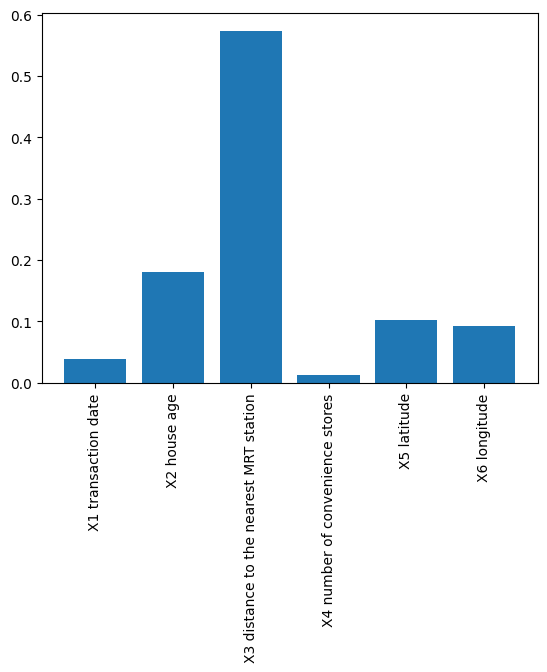

In [ ]:
plt.bar(x=X_train.columns,height=reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

This following block is for AdaBoost Regressor, again it is not possible to plot the individual trees, it is however possible to plot the feature importance  

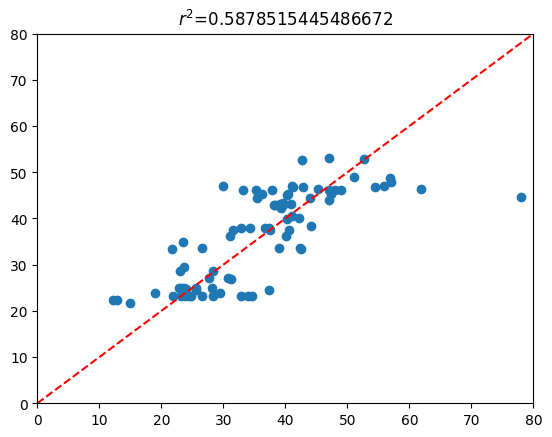

In [ ]:
reg=AdaBoostRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test,y_test)}')
plt.show()

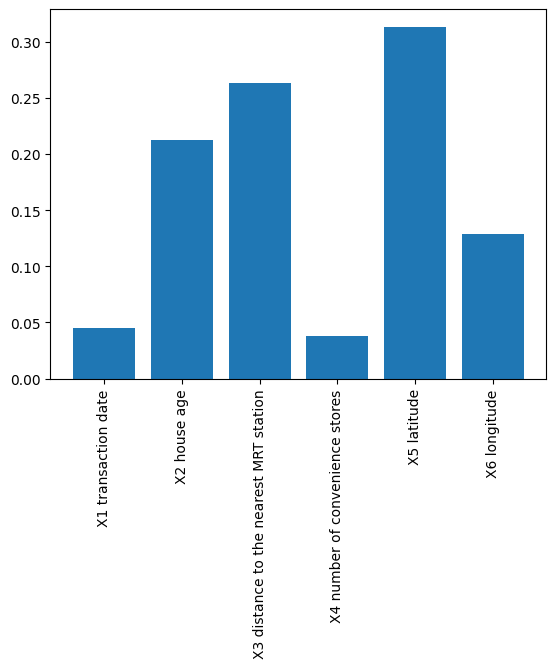

In [ ]:
plt.bar(x=X_train.columns,height=reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

This following block is for KNeighborRegressor

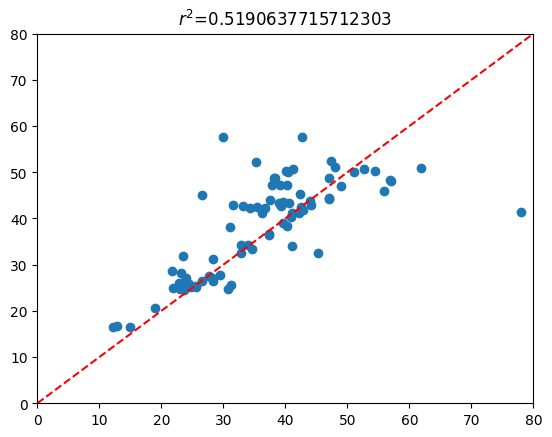

In [ ]:
reg=KNeighborsRegressor()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test_scaled,y_test)}')
plt.show()

This following block is for Support Vector Regression, in this non-linear model, the explaination to the model is a bit more complex and cannot be visualized directly

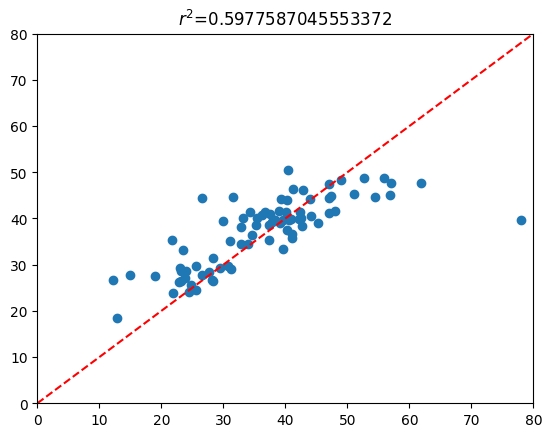

In [ ]:
reg=SVR()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.ylim([0,80])
plt.xlim([0,80])
plt.plot([0,100],[0,100],'--r')
plt.title(f'$r^2$={reg.score(X_test_scaled,y_test)}')
plt.show()

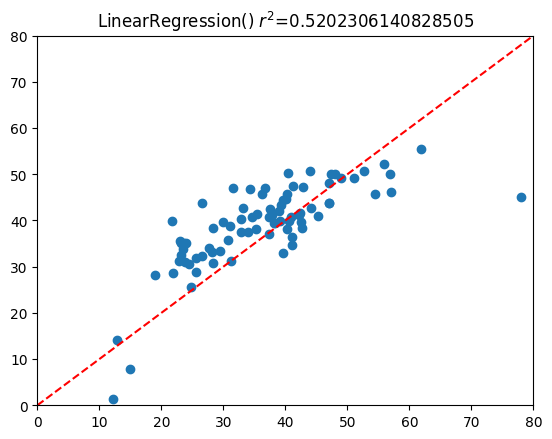

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


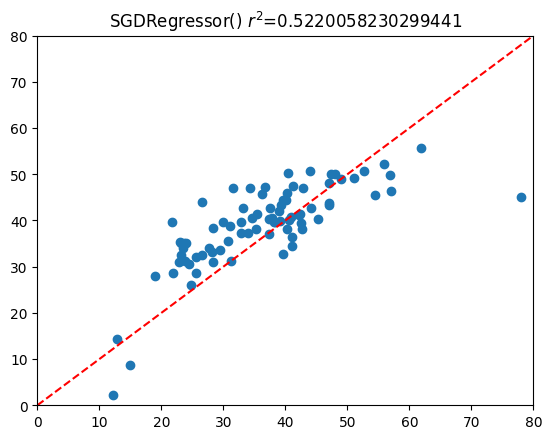

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


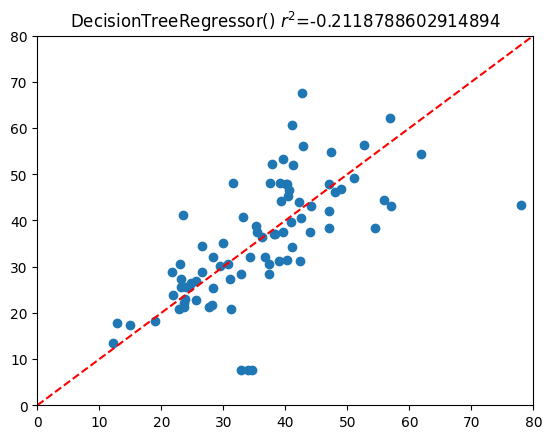

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


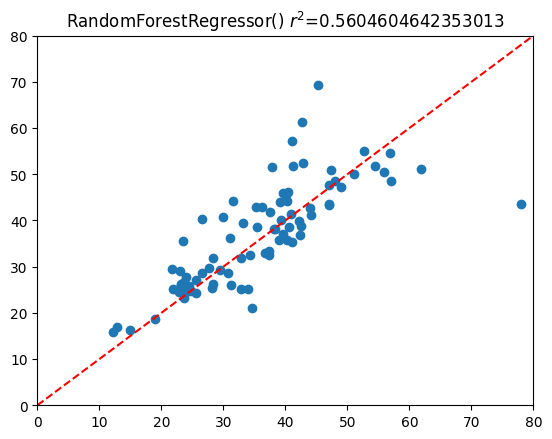

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


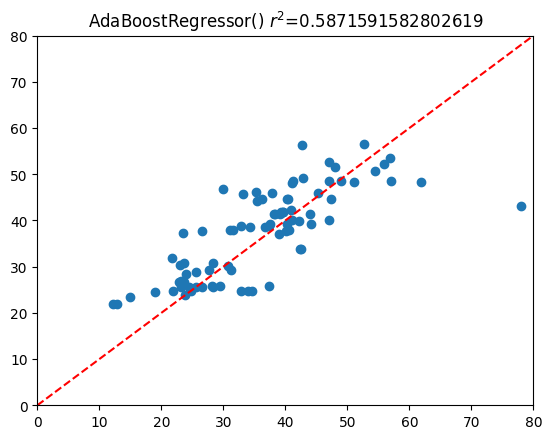

{'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


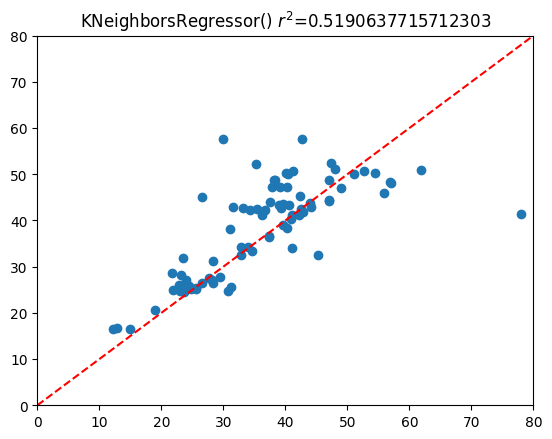

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


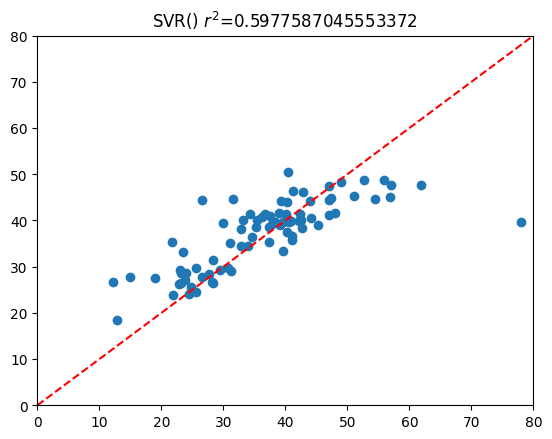

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
regressors = [LinearRegression(),
              SGDRegressor(),
              DecisionTreeRegressor(),
              RandomForestRegressor(),
              AdaBoostRegressor(),
              KNeighborsRegressor(),
              SVR()]

for reg in regressors:
  reg.fit(X_train_scaled,y_train)
  y_pred=reg.predict(X_test_scaled)
  plt.scatter(y_test,y_pred)
  plt.ylim([0,80])
  plt.xlim([0,80])
  plt.plot([0,100],[0,100],'--r')
  plt.title(f'{reg} $r^2$={reg.score(X_test_scaled,y_test)}')
  plt.show()


In [ ]:
reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

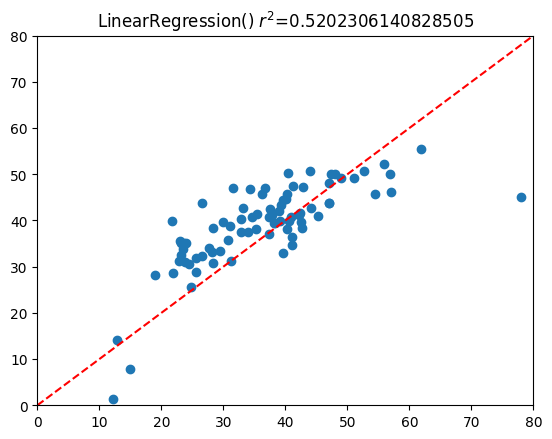

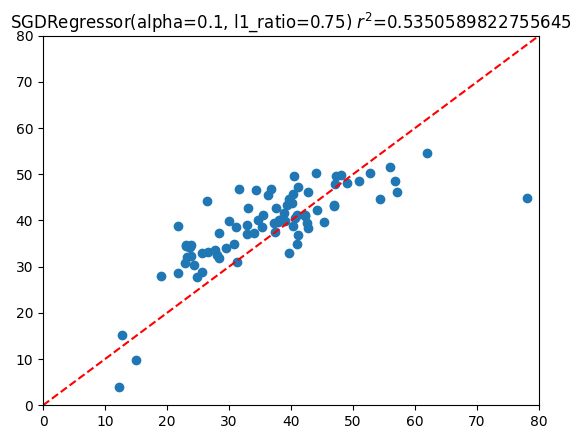

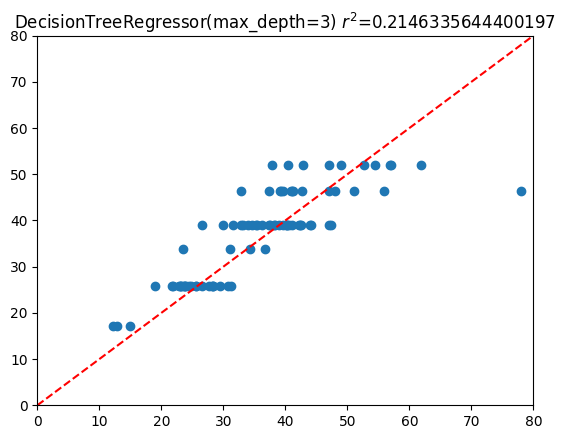

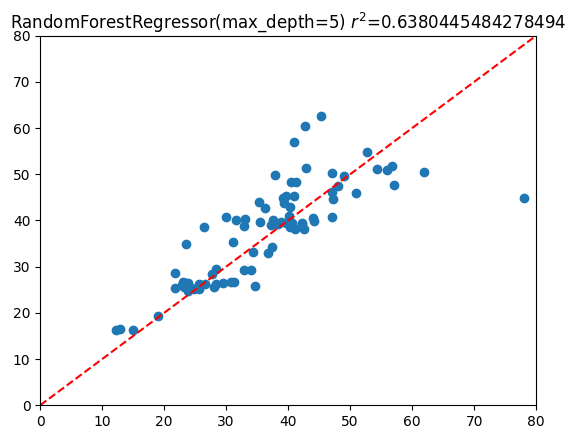

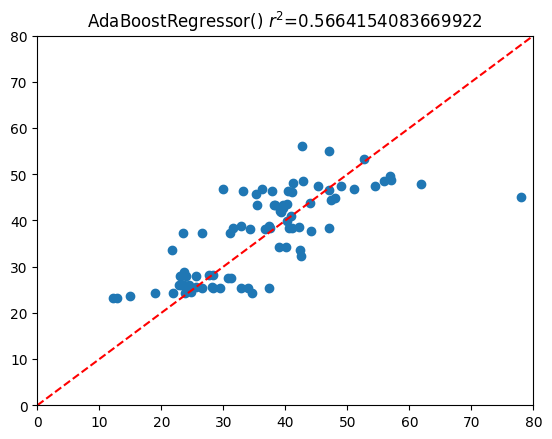

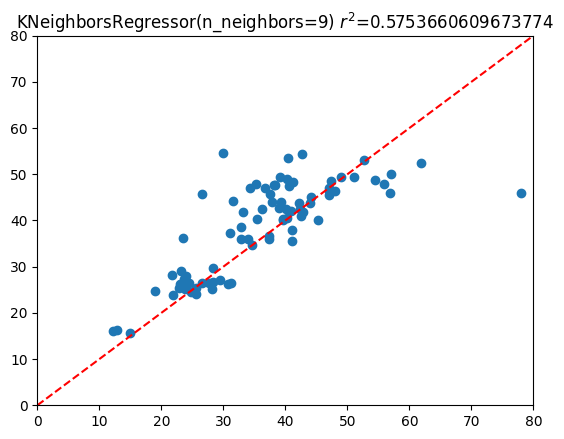

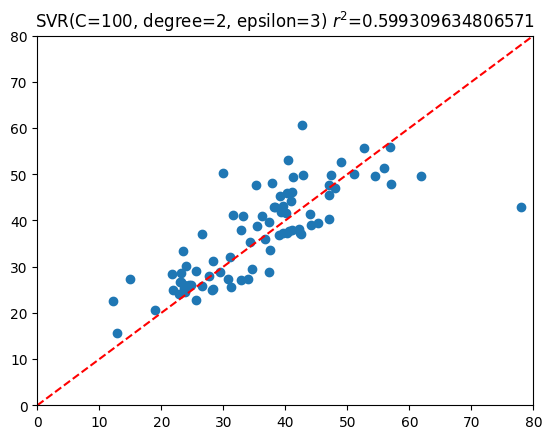

In [ ]:
params_dict= [{},
              { 'alpha': [0.01,0.1,1,10],
                'l1_ratio':[0,0.25,0.5,0.75,1]},
              { 'max_depth': [3,5,7,9,None]},
              { 'max_depth': [3,5,7,9,None],
               'n_estimators': [100,200,500]},
              { 'n_estimators': [50,100,150]},
              { 'n_neighbors': [3,5,9,15,21,31]},
              { 'C': [1.0,10,100,1000],
                'degree': [2,3],
  'kernel': ['poly','rbf'],
  'epsilon': [0.1, 1, 3]}]

regressors = [LinearRegression(),
              SGDRegressor(),
              DecisionTreeRegressor(),
              RandomForestRegressor(),
              AdaBoostRegressor(),
              KNeighborsRegressor(),
              SVR()]

for idx,reg in enumerate(regressors):
  gridsearch=GridSearchCV(reg,params_dict[idx])
  gridsearch.fit(X_train_scaled,y_train)
  reg.set_params(**gridsearch.best_params_)
  reg.fit(X_train_scaled,y_train)
  y_pred=reg.predict(X_test_scaled)
  plt.scatter(y_test,y_pred)
  plt.ylim([0,80])
  plt.xlim([0,80])
  plt.plot([0,100],[0,100],'--r')
  plt.title(f'{reg} $r^2$={reg.score(X_test_scaled,y_test)}')
  plt.show()

In [ ]:
gridsearch=GridSearchCV(regressors[1],params_dict[1])
gridsearch.fit(X_train_scaled,y_train)
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004532,0.001596,0.003254,0.004538,0.01,0,"{'alpha': 0.01, 'l1_ratio': 0}",0.584174,0.678700,0.683594,0.367824,0.422475,0.547353,0.130380,10
1,0.002974,0.000371,0.000829,0.000028,0.01,0.25,"{'alpha': 0.01, 'l1_ratio': 0.25}",0.586660,0.678894,0.681879,0.370558,0.422481,0.548094,0.129454,7
2,0.005518,0.003681,0.000919,0.000138,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",0.588268,0.679162,0.681586,0.366794,0.422636,0.547689,0.130554,8
3,0.005529,0.002636,0.002405,0.002907,0.01,0.75,"{'alpha': 0.01, 'l1_ratio': 0.75}",0.585610,0.677866,0.684727,0.370195,0.423187,0.548317,0.129743,6
4,0.007584,0.003993,0.003072,0.004099,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",0.584183,0.678603,0.682433,0.368759,0.422816,0.547359,0.129796,9
5,0.006179,0.004128,0.000983,0.000119,0.1,0,"{'alpha': 0.1, 'l1_ratio': 0}",0.592546,0.679286,0.676196,0.400965,0.415626,0.552924,0.122209,2
6,0.001657,0.000350,0.000499,0.000040,0.1,0.25,"{'alpha': 0.1, 'l1_ratio': 0.25}",0.590822,0.679451,0.674856,0.400768,0.415251,0.552229,0.121997,3
7,0.001406,0.000195,0.000465,0.000013,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.590141,0.680015,0.675283,0.399637,0.413205,0.551656,0.122898,5
8,0.001759,0.000102,0.000529,0.000101,0.1,0.75,"{'alpha': 0.1, 'l1_ratio': 0.75}",0.591596,0.679768,0.676350,0.403586,0.415562,0.553372,0.121645,1
9,0.001542,0.000226,0.000483,0.000012,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",0.592494,0.679687,0.675832,0.399131,0.413487,0.552126,0.123152,4


SyntaxError: ignored